# Linear Regression

# Using Custom Code

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Two Points are given (3, 5) and (9,10)
#Find equation of line ? 
def slope_intercept(x1,y1,x2,y2):
    a = (y2 - y1) / (x2 - x1)
    b = y1 - a * x1     
    return a,b
m,c = slope_intercept(3,5,9,10)
print(slope_intercept(3,5,9,10))
print("Equation of line : y = {0:.2f}.x + {1}".format(m,c))

(0.8333333333333334, 2.5)
Equation of line : y = 0.83.x + 2.5


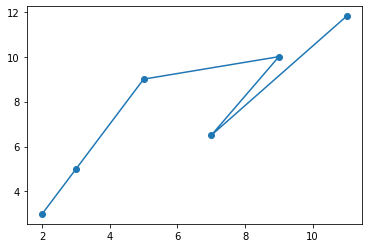

In [4]:
# X : 2, 3, 5, 9, 7, 11, 10.5
# Y : 3, 5, 9, 10, 6,5, 11.8, ?
X =[ 2, 3, 5, 9, 7, 11]
Y =[ 3, 5, 9, 10, 6.5, 11.8] 

# Ploting Line
plt.scatter(X,Y,label='Scatter plot')
plt.plot(X,Y,label='Line')

In [5]:
X

[2, 3, 5, 9, 7, 11]

In [6]:
# Collecting X and Y
X = [171,151,124,134,156]  
Y = [80,60,45,50,65]       

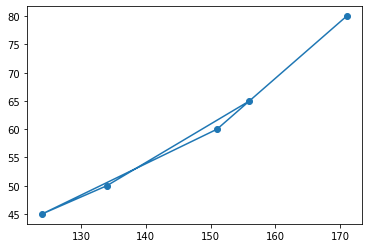

In [7]:
plt.scatter(X,Y,label='Scatter plot')
plt.plot(X,Y,label='Line')

In [8]:
# Calculating Coefficient

# Mean X and Y
mean_x = np.mean(X)
mean_y = np.mean(Y)

# Total no of values
n=len(X)

print(mean_x)
print(mean_y)
print(n)

147.2
60.0
5


In [9]:
numer=0
denom=0
for i in range(n):
    numer += (X[i] - mean_x) * (Y[i] - mean_y)
    denom += (X[i] - mean_x) ** 2
b1 = numer / denom
b0 = mean_y - (b1 * mean_x)

# printing coefficients
print("Coefficients:", b1, b0)

Coefficients: 0.7295010213014298 -47.38255033557046


In [10]:
# Predict the weight of the person having weight=130?
x=171
y = b1 * x + b0
print(y)

77.36212430697404


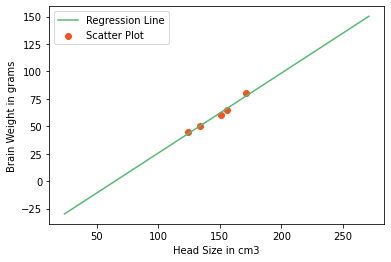

In [11]:
# Plotting Values and Regression Line

max_x = np.max(X) + 100
min_x = np.min(X) - 100

# Calculating line values x and y
x = np.linspace(min_x, max_x,100)
y =[]
for i in range(100):
    y.append(b0 + b1 * x[i])
#print(y)

# Ploting Line
plt.plot(x, y, color='#58b970', label='Regression Line')
# Ploting Scatter Points
plt.scatter(X, Y, color='#ef5423', label='Scatter Plot')

plt.xlabel('Head Size in cm3')
plt.ylabel('Brain Weight in grams')
plt.legend()
plt.show()

In [12]:
# Calculating Root Mean Squares Error
rmse = 0
for i in range(n):
    y_pred = b0 + b1 * X[i]
    rmse += (Y[i]-y_pred)**2
rmse= np.sqrt(rmse/n)
print("RMSE:",rmse)

RMSE: 2.02479523402097


In [13]:
# Calculating R2 Score
ss_tot = 0
ss_res = 0
for i in range(n):
    y_pred = b0 + b1 * X[i]
    ss_tot += (Y[i] - mean_y) ** 2
    ss_res += (Y[i] - y_pred) ** 2
r2 = 1-(ss_res/ss_tot)
print("R2 Score:",r2)

R2 Score: 0.9726680284019065


# Using sklearn Library

In [14]:
import numpy as np
from sklearn.linear_model import LinearRegression

X = np.array([171,151,124,134,156])
y = np.array([80,60,45,50,65])

clf = LinearRegression()

clf.fit(X.reshape(-1,1),y) # you want a COLUMN vector (many samples, 1 feature)

a=clf.predict([[171]])

print(a)

[77.36212431]


mean_x: 3633.9915611814345
mean_y: 1282.873417721519
Coefficients
b1 , b0:  0.26342933948939945 325.57342104944223


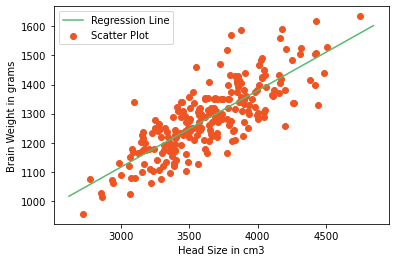

RMSE:  72.1206213783709
R2 Score:  0.6393117199570003


In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Reading Data
data = pd.read_csv('headbrain.csv')
data.head()

# Collecting X and Y
X = data['Head Size(cm^3)'].values
Y = data['Brain Weight(grams)'].values

# Calculating coefficient

# Mean X and Y
mean_x = np.mean(X)
mean_y = np.mean(Y)
print("mean_x:",mean_x)
print("mean_y:", mean_y)


# Total number of values
n = len(X)

# Using the formula to calculate b0 and b1
numer = 0
denom = 0
for i in range(n):
    numer += (X[i] - mean_x) * (Y[i] - mean_y)
    denom += (X[i] - mean_x) ** 2
b1 = numer / denom
b0 = mean_y - (b1 * mean_x)

# Printing coefficients
print("Coefficients")
print("b1 , b0: ",b1, b0)

# Plotting Values and Regression Line

max_x = np.max(X) + 100
min_x = np.min(X) - 100

# Calculating line values x and y
x = np.linspace(min_x, max_x, 1000)
y = b0 + b1 * x

# Ploting Line
plt.plot(x, y, color='#58b970', label='Regression Line')
# Ploting Scatter Points
plt.scatter(X, Y, c='#ef5423', label='Scatter Plot')

plt.xlabel('Head Size in cm3')
plt.ylabel('Brain Weight in grams')
plt.legend()
plt.show()

# Calculating Root Mean Squares Error
rmse = 0
for i in range(n):
    y_pred = b0 + b1 * X[i]
    rmse += (Y[i] - y_pred) ** 2
rmse = np.sqrt(rmse/n)
print("RMSE: ",rmse)


# Calculating R2 Score
ss_tot = 0
ss_res = 0
for i in range(n):
    y_pred = b0 + b1 * X[i]
    ss_tot += (Y[i] - mean_y) ** 2
    ss_res += (Y[i] - y_pred) ** 2
r2 = 1 - (ss_res/ss_tot)
print("R2 Score: ",r2)


In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Reading Data
data = pd.read_csv('headbrain.csv')
data.head()

# Collecting X and Y
X = data['Head Size(cm^3)'].values
Y = data['Brain Weight(grams)'].values
data.iloc[0:5,0:1]

m = len(X)

X = X.reshape((m, 1))

# Model Intialization
reg = LinearRegression()
# Data Fitting
reg = reg.fit(X, Y)
# Y Prediction
Y_pred = reg.predict(X)

print('Intercept: \n', reg.intercept_)
print('Coefficients: \n', reg.coef_)

# Model Evaluation
rmse = np.sqrt(mean_squared_error(Y, Y_pred))
r2 = reg.score(X, Y)


print("RMSE")
print(rmse)
print("R2 Score")
print(r2)

Intercept: 
 325.5734210494428
Coefficients: 
 [0.26342934]
RMSE
72.1206213783709
R2 Score
0.639311719957


# weight-height.csv

In [20]:
df = pd.read_csv('weight-height.csv')
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


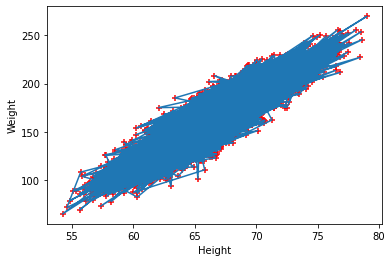

In [21]:
plt.xlabel('Height')
plt.ylabel('Weight')
plt.scatter(df.Height,df.Weight,color='red',marker='+')
plt.plot(df.Height,df.Weight,label='Line')

In [22]:
X = []
for i in df.Height:
    X.append(i)
# X

In [23]:
Y = []
for j in df.Weight:
    Y.append(j)


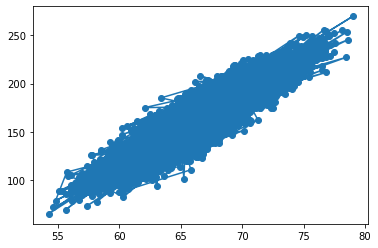

In [24]:
plt.scatter(X,Y,label='Scatter plot')
plt.plot(X,Y,label='Line')

In [25]:
# Calculating Coefficient

# Mean X and Y
mean_x = np.mean(X)
mean_y = np.mean(Y)

# Total no of values
n=len(X)

print(mean_x)
print(mean_y)
print(n)

66.36755975482124
161.44035683283076
10000


In [26]:
numer=0
denom=0
for i in range(n):
    numer += (X[i] - mean_x) * (Y[i] - mean_y)
    denom += (X[i] - mean_x) ** 2
b1 = numer / denom
b0 = mean_y - (b1 * mean_x)

# printing coefficients
print("Coefficients:", b1, b0)

Coefficients: 7.717287640785375 -350.7371918121361


In [27]:
# Predict the weight of the person 
x=73.847017
y = b1 * x + b0
print(y)

219.16147979083132


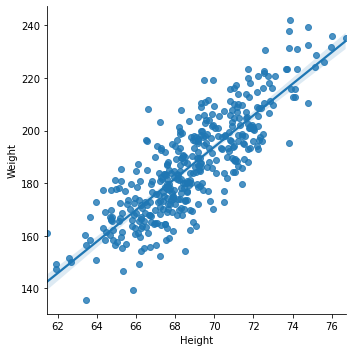

In [28]:
sns.lmplot(x='Height',y='Weight',data=df[:400])

# Gradient Descent

### Gradient descent is a name for a generic class of computer algorith which minimize a function.

### These algorithms achieve this end by starting with initial parameter alues and iteratively moving towards parameter values that minimize some cost function or metric-that's the descent part.

### The movement toward best-fit is achieved by taking the derivative of the variable or variables involved, in the direction with the lowest (calculus-defined) gradient-that's the gradient part.

In [45]:
class LinearRegCustom:
    # constructor
    def __init__(self, lr=0.1):
        self.lr = lr
    
    # training function i.e. fit
    def fit(self, X, y):
        self._X = X # _X mock behavior like private
        self._y = y.reshape(-1, 1) # do calculations, else it will give error due to some numpy shape
        
        # need to figure out value of coef & intercept
        # step 1: pick these values at random 
        self.coef_ = np.random.random()
        self.intercept_ = np.random.random()
        
        # gradient descent
        errors = []
        
        # lets say we do this 50 times
        for i in range(50):
            self.gradient_decend()
            errors.append(self.error())
        return errors
    
    def gradient_decend(self):
        # change in coef and intercept
        d_coef, d_intercept = self.gradient()
        self.coef_ -= d_coef * self.lr
        self.intercept_ -= d_intercept * self.lr
    
    def gradient(self):
        yh = self.predict(self._X) # from predict funtion
        
        d_coef = ((yh - self._y) * self._X).mean()
        d_intercept = (yh - self._y).mean()
        
        return d_coef, d_intercept
    
    def predict(self, X):
        return X * self.coef_ + self.intercept_
    
    def error(self):
        return ((self.predict(self._X) - self._y) ** 2).sum()
    

In [38]:
# Preprocessing Input data
data = pd.read_csv(r'headbrain.csv')
# Collecting X and Y
X = data['Head Size(cm^3)'].values/1000
y = data['Brain Weight(grams)'].values/1000


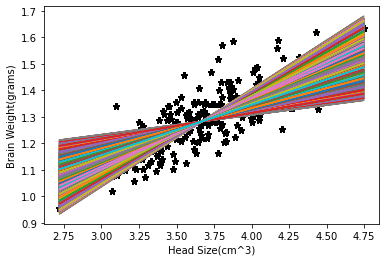

In [52]:
for i in range(1000):
    clf = LinearRegCustom(lr=.1)
    clf.fit(X, y)
    plt.scatter(X, y, color='black',marker='*')
    plt.plot(X, clf.predict(X))
    plt.xlabel('Head Size(cm^3)')  
    plt.ylabel('Brain Weight(grams)')